In [1]:
# Importing Libraries
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [2]:
# Load sklearn's breast cancer dataset
X, y = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
X.shape, y.shape

((569, 30), (569,))

In [4]:
y.unique()

array([0, 1])

In [5]:
y.value_counts()

,count
target,
1,357
0,212


In [6]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=1)
len(X_train), len(X_test), len(y_train), len(y_test)

(455, 114, 455, 114)

In [7]:
# Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [8]:
print('Accuracy on the test set:', round(gnb.score(X_test, y_test), 4))

Accuracy on the test set: 0.9474


In [9]:
# Plot Confusion Matrix
cat_labels = ['malignant', 'benign']
y_pred = gnb.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=cat_labels)


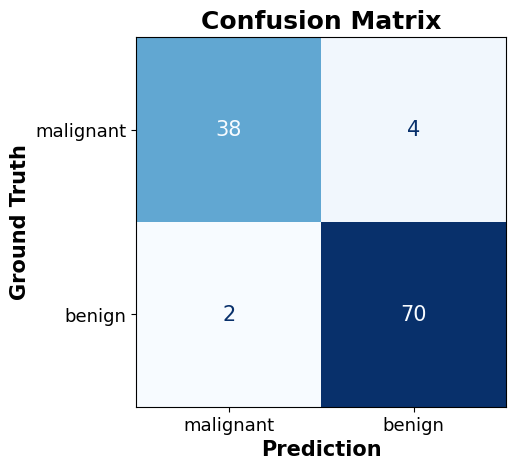

In [10]:
disp.plot(cmap='Blues', colorbar=False, text_kw={'size': 15})

plt.xlabel('Prediction', fontsize=15, fontweight='bold')
plt.ylabel('Ground Truth', fontsize=15, fontweight='bold')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')

plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

In [11]:
y_test.value_counts()

,count
target,
1,72
0,42


In [12]:
print('Precision:', round(metrics.precision_score(y_test, y_pred), 4))
print('Recall:', round(metrics.recall_score(y_test, y_pred), 4))
print('F1 score:', round(metrics.f1_score(y_test, y_pred), 4))
print('Jaccard score:', round(metrics.jaccard_score(y_test, y_pred), 4))

Precision: 0.9459
Recall: 0.9722
F1 score: 0.9589
Jaccard score: 0.9211


In [13]:
# Print classification report
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

